In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 금연.txt'
    
f = open(openFileName, 'r', encoding='euc-kr')
result = f.read()
f.close()

In [3]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [4]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [5]:
print(X)

  (0, 11607)	1
  (1, 1777)	1
  (2, 2)	1
  (3, 2286)	1
  (4, 9052)	1
  (5, 9665)	1
  (6, 1277)	1
  (7, 4455)	1
  (8, 2)	1
  (9, 2720)	1
  (10, 1093)	1
  (11, 7719)	1
  (12, 6628)	1
  (13, 2697)	1
  (14, 4455)	1
  (15, 9271)	1
  (16, 7270)	1
  (17, 6648)	1
  (18, 2084)	1
  (19, 8963)	1
  (20, 629)	1
  (21, 7205)	1
  (22, 4455)	1
  (23, 6630)	1
  (24, 7277)	1
  :	:
  (205996, 2720)	1
  (205997, 111)	1
  (205998, 10567)	1
  (205999, 994)	1
  (206000, 1983)	1
  (206001, 1651)	1
  (206002, 1030)	1
  (206003, 1277)	1
  (206004, 7959)	1
  (206005, 9053)	1
  (206006, 430)	1
  (206007, 9171)	1
  (206008, 8697)	1
  (206009, 10412)	1
  (206010, 10291)	1
  (206011, 8330)	1
  (206012, 10291)	1
  (206013, 9077)	1
  (206014, 8455)	1
  (206015, 9053)	1
  (206016, 9012)	1
  (206017, 3352)	1
  (206018, 1983)	1
  (206019, 10586)	1
  (206020, 2566)	1


In [6]:
print(vectorize.vocabulary_)

{'하카': 11607, '년전': 1777, '가격': 2, '대폭': 2286, '전자기기': 9052, '지금': 9665, '금연': 1277, '보조': 4455, '디자인': 2720, '굳이': 1093, '요즘': 7719, '아이': 6628, '등장': 2697, '제의': 9271, '역활': 7270, '아주': 6648, '단점': 2084, '저희': 8963, '고객': 629, '여러분': 7205, '아이디어': 6630, '연구': 7277, '여성': 7221, '거부': 391, '바로': 3942, '이야기': 8298, '생김새': 5364, '흡사': 12302, '자동차': 8666, '리모콘': 3035, '여기': 7197, '전자담배': 9053, '약자': 6908, '폐쇄형': 11252, '화기': 12097, '보통': 4464, '유형': 8042, '가지': 114, '크게': 10675, '상형': 5325, '궐련': 1133, '경우': 574, '니코틴': 1965, '액살': 6855, '수증기': 5928, '흡입': 12310, '기존': 1385, '연초': 7335, '사용': 5087, '달리': 2104, '가열': 86, '원리': 7868, '또한': 2794, '오늘': 7467, '소개': 5703, '제품': 9294, '다른': 1991, '카트리지': 10470, '분리': 4671, '때문': 2773, '매번': 3342, '리필': 3077, '기기': 1314, '청소': 10129, '분량': 4669, '정도': 9158, '직접': 9774, '후기': 12218, '더욱': 2331, '대전': 2261, '스물': 6045, '여대생': 7200, '피씨': 11475, '대학교': 2291, '처음': 10061, '부터': 4640, '아버지': 6594, '자연': 8699, '대해': 2301, '선입견': 5514, '수능': 5855, '준비'

In [7]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'하카': 370,
 '년전': 8,
 '가격': 504,
 '대폭': 9,
 '전자기기': 51,
 '지금': 432,
 '금연': 5838,
 '보조': 521,
 '디자인': 521,
 '굳이': 54,
 '요즘': 491,
 '아이': 432,
 '등장': 33,
 '제의': 25,
 '역활': 10,
 '아주': 294,
 '단점': 108,
 '저희': 305,
 '고객': 121,
 '여러분': 191,
 '아이디어': 8,
 '연구': 252,
 '여성': 104,
 '거부': 58,
 '바로': 667,
 '이야기': 207,
 '생김새': 5,
 '흡사': 6,
 '자동차': 32,
 '리모콘': 3,
 '여기': 287,
 '전자담배': 11262,
 '약자': 5,
 '폐쇄형': 4,
 '화기': 215,
 '보통': 133,
 '유형': 14,
 '가지': 871,
 '크게': 121,
 '상형': 264,
 '궐련': 498,
 '경우': 675,
 '니코틴': 1752,
 '액살': 1,
 '수증기': 135,
 '흡입': 584,
 '기존': 324,
 '연초': 1045,
 '사용': 2811,
 '달리': 75,
 '가열': 110,
 '원리': 24,
 '또한': 423,
 '오늘': 405,
 '소개': 251,
 '제품': 2201,
 '다른': 551,
 '카트리지': 589,
 '분리': 125,
 '때문': 1154,
 '매번': 61,
 '리필': 65,
 '기기': 1356,
 '청소': 200,
 '분량': 40,
 '정도': 857,
 '직접': 363,
 '후기': 172,
 '더욱': 168,
 '대전': 54,
 '스물': 5,
 '여대생': 2,
 '피씨': 3,
 '대학교': 20,
 '처음': 636,
 '부터': 97,
 '아버지': 64,
 '자연': 44,
 '대해': 406,
 '선입견': 4,
 '수능': 2,
 '준비': 259,
 '스트레스': 179,
 '대기': 17,
 '시작': 

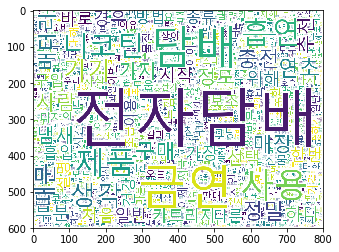

In [10]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [11]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'하카': 11607, '년전': 1777, '가격': 2, '대폭': 2286, '전자기기': 9052, '지금': 9665, '금연': 1277, '보조': 4455, '디자인': 2720, '굳이': 1093, '요즘': 7719, '아이': 6628, '등장': 2697, '제의': 9271, '역활': 7270, '아주': 6648, '단점': 2084, '저희': 8963, '고객': 629, '여러분': 7205, '아이디어': 6630, '연구': 7277, '여성': 7221, '거부': 391, '바로': 3942, '이야기': 8298, '생김새': 5364, '흡사': 12302, '자동차': 8666, '리모콘': 3035, '여기': 7197, '전자담배': 9053, '약자': 6908, '폐쇄형': 11252, '화기': 12097, '보통': 4464, '유형': 8042, '가지': 114, '크게': 10675, '상형': 5325, '궐련': 1133, '경우': 574, '니코틴': 1965, '액살': 6855, '수증기': 5928, '흡입': 12310, '기존': 1385, '연초': 7335, '사용': 5087, '달리': 2104, '가열': 86, '원리': 7868, '또한': 2794, '오늘': 7467, '소개': 5703, '제품': 9294, '다른': 1991, '카트리지': 10470, '분리': 4671, '때문': 2773, '매번': 3342, '리필': 3077, '기기': 1314, '청소': 10129, '분량': 4669, '정도': 9158, '직접': 9774, '후기': 12218, '더욱': 2331, '대전': 2261, '스물': 6045, '여대생': 7200, '피씨': 11475, '대학교': 2291, '처음': 10061, '부터': 4640, '아버지': 6594, '자연': 8699, '대해': 2301, '선입견': 5514, '수능': 5855, '준비'

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

stop_list=['금연', '선택', '요즘', '현재', '대한', '제품', '먼저', '물질', '유해', '언제', '느낌', '제일', '부분', '연초', '담배', '달리', '방법', '한번', '사용', '사실', '거의', '위해', '배터리', '만큼', '발표', '항상', '정도', '청소', '직접', '가장', '이번', '전자담배', '결과', '증상', '모두', '카트리지', '자체', '정말', '포함', '서면', '코일', '저희', '마음', '역시', '사진', '통해', '모든', '시작', '일반', '여기', '무엇', '중독', '이용', '하나', '동안', '모드', '방식', '차이', '여러분', '사람', '다른', '내용', '니코틴', '조금', '처음', '확인', '우리', '탱크', '등등', '이유', '하루', '아주', '약간', '효과', '매우', '점점', '계속', '진짜', '최근', '가지', '설명', '경우', '실제', '해도', '거나', '오늘', '거기', '다시', '기능', '완전', '때문', '또한', '오히려', '일단', '부산', '생각', '하카', '여러', '바로', '블랙', '전혀', '그냥', '하니', '친구', '지금', '뭔가', '시간', '보고', '이제', '궐련', '대해', '기존', '대신', '더욱', '소개', '흡연', '보통', '상이']
for i in stop_list:
    dict_result.pop(i)


# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('기기', 1356.0)
('충전', 1071.0)
('매장', 950.0)
('구매', 931.0)
('냄새', 886.0)
('추천', 802.0)
('흡입', 584.0)
('종류', 567.0)
('구입', 556.0)
('건강', 538.0)
('보조', 521.0)
('디자인', 521.0)
('시연', 518.0)
('선물', 508.0)
('방문', 506.0)
('연기', 505.0)
('가격', 504.0)
('사장', 485.0)
('도움', 448.0)
('아이', 432.0)
('판매', 392.0)
('코스', 361.0)
('충전기', 347.0)
('전자', 341.0)
('스틱', 334.0)
('호흡', 317.0)
('색상', 316.0)
('카토', 313.0)
('용량', 298.0)
('에바', 291.0)
('버튼', 287.0)
('마이', 280.0)
('새해', 270.0)
('이상', 267.0)
('과일', 265.0)
('전담', 265.0)
('상형', 264.0)
('주변', 262.0)
('멘솔', 261.0)
('준비', 259.0)
('시도', 259.0)
('보기', 257.0)
('파이프', 253.0)
('연구', 252.0)
('고민', 250.0)
('코리아', 244.0)
('타르', 243.0)
('장점', 238.0)
('성분', 238.0)
('케이스', 236.0)
('위치', 236.0)
('교체', 235.0)
('휴대', 230.0)
('인기', 227.0)
('다음', 227.0)
('도전', 227.0)
('포스팅', 227.0)
('결심', 225.0)
('참고', 225.0)
('자신', 224.0)
('담배값', 221.0)
('상담', 219.0)
('멀티', 218.0)
('성공', 216.0)
('화기', 215.0)
('브랜드', 215.0)
('의지', 213.0)
('모습', 210.0)
('기계', 208.0)
('이야기', 207.0)
('걱정', 20

('간단', 9.0)
('신문', 9.0)
('절연', 9.0)
('새벽', 9.0)
('자라', 9.0)
('감탄', 9.0)
('포항', 9.0)
('블루투스', 9.0)
('내기', 9.0)
('오리', 9.0)
('안약', 9.0)
('바레니클린', 9.0)
('일보', 9.0)
('알데히드', 9.0)
('장시간', 9.0)
('다수', 9.0)
('흥덕구', 9.0)
('각심', 9.0)
('세월', 9.0)
('오염', 9.0)
('처방전', 9.0)
('억지로', 9.0)
('스크린', 9.0)
('네모', 9.0)
('면액', 9.0)
('연제구', 9.0)
('감안', 9.0)
('탈피', 9.0)
('티비', 9.0)
('중후', 9.0)
('불쾌감', 9.0)
('일부러', 9.0)
('도파민', 9.0)
('잇몸', 9.0)
('거꾸로', 9.0)
('이태원', 9.0)
('컨디션', 9.0)
('듯이', 9.0)
('배너', 9.0)
('멈리', 9.0)
('고정', 9.0)
('방영', 9.0)
('나비', 9.0)
('젤리', 9.0)
('중년', 9.0)
('갈수록', 9.0)
('수백만', 9.0)
('노릇', 9.0)
('선풍', 9.0)
('전쟁', 9.0)
('훈련', 9.0)
('카카오', 9.0)
('려고', 9.0)
('오래오래', 9.0)
('사양', 9.0)
('가세', 9.0)
('강북', 9.0)
('누룽지', 9.0)
('영등포', 9.0)
('방기', 9.0)
('레전드', 9.0)
('당분간', 9.0)
('이글', 9.0)
('한남', 9.0)
('런가', 9.0)
('잡지', 9.0)
('젠트', 9.0)
('레시피', 9.0)
('큐브', 9.0)
('근로자', 9.0)
('여물', 9.0)
('전투', 9.0)
('가모', 9.0)
('박서방', 9.0)
('스프링', 9.0)
('마스크', 9.0)
('레쉬', 9.0)
('심장마비', 9.0)
('신중', 9.0)
('카시', 9.0)
('미네'

('그랜드마스터', 3.0)
('마마', 3.0)
('장내', 3.0)
('고함', 3.0)
('보태', 3.0)
('스읍', 3.0)
('취해', 3.0)
('괴물', 3.0)
('초월', 3.0)
('사도', 3.0)
('나씨', 3.0)
('고스', 3.0)
('요사', 3.0)
('청색', 3.0)
('꾸욱', 3.0)
('이대', 3.0)
('단돈', 3.0)
('거저', 3.0)
('느므', 3.0)
('개도', 3.0)
('상종', 3.0)
('효용', 3.0)
('디자이너', 3.0)
('안양동', 3.0)
('의정부역', 3.0)
('헐리우드', 3.0)
('쌍둥이', 3.0)
('지난주', 3.0)
('오렌지색', 3.0)
('이천', 3.0)
('아지트', 3.0)
('급상승', 3.0)
('베스트셀러', 3.0)
('고합', 3.0)
('대장', 3.0)
('방이', 3.0)
('은행', 3.0)
('대리석', 3.0)
('커넥터', 3.0)
('여량', 3.0)
('케릭', 3.0)
('미스트', 3.0)
('고제', 3.0)
('브러쉬', 3.0)
('광채', 3.0)
('칠성도', 3.0)
('사혼', 3.0)
('거란', 3.0)
('부상', 3.0)
('경지', 3.0)
('전음', 3.0)
('노리', 3.0)
('요아킴', 3.0)
('만우절', 3.0)
('이주일', 3.0)
('아두', 3.0)
('로움', 3.0)
('지역별', 3.0)
('설연휴', 3.0)
('했더랬', 3.0)
('조깅', 3.0)
('드라이브', 3.0)
('스톰', 3.0)
('얼음', 3.0)
('드랍데드', 3.0)
('개나리', 3.0)
('접점', 3.0)
('가지가지', 3.0)
('가즈', 3.0)
('선두', 3.0)
('리티', 3.0)
('보나', 3.0)
('이쯤', 3.0)
('정품액', 3.0)
('염두', 3.0)
('문의사항', 3.0)
('영세', 3.0)
('원타임', 3.0)
('분만', 3.0)
('년초', 3.0

('런타임', 1.0)
('잘만드', 1.0)
('알트리아', 1.0)
('개명', 1.0)
('말장난', 1.0)
('광고주', 1.0)
('카피캣', 1.0)
('모방', 1.0)
('범죄자', 1.0)
('금번', 1.0)
('건만', 1.0)
('골로', 1.0)
('스투레스', 1.0)
('일터', 1.0)
('승부', 1.0)
('종지부', 1.0)
('얼추', 1.0)
('사용튜닝', 1.0)
('프리뷰', 1.0)
('백수', 1.0)
('력셔', 1.0)
('잡담', 1.0)
('편안', 1.0)
('낚캠', 1.0)
('겟또', 1.0)
('홧팅', 1.0)
('대티역', 1.0)
('정시', 1.0)
('학생증', 1.0)
('레소', 1.0)
('분별', 1.0)
('아스팔트', 1.0)
('몸밖', 1.0)
('서일', 1.0)
('간담', 1.0)
('자치구', 1.0)
('설령', 1.0)
('번시', 1.0)
('맛좀', 1.0)
('창밖', 1.0)
('폭죽', 1.0)
('뿜었', 1.0)
('제이다', 1.0)
('중등', 1.0)
('파일럿', 1.0)
('박실', 1.0)
('올드', 1.0)
('골도', 1.0)
('프라스', 1.0)
('남천동', 1.0)
('광안동', 1.0)
('용호동', 1.0)
('감만동', 1.0)
('쏘울', 1.0)
('버터플라이', 1.0)
('사철', 1.0)
('맛외', 1.0)
('사천', 1.0)
('함안', 1.0)
('숙제', 1.0)
('짤방', 1.0)
('글루', 1.0)
('바코', 1.0)
('가잔', 1.0)
('쪼끔', 1.0)
('넌지시', 1.0)
('마음씨', 1.0)
('부활동', 1.0)
('시로', 1.0)
('재단', 1.0)
('어린이재단', 1.0)
('방촌', 1.0)
('환원', 1.0)
('이천원', 1.0)
('현격히', 1.0)
('영유', 1.0)
('부정맥', 1.0)
('인척', 1.0)
('올인원', 1.0)
('비호감', 1.0)


('자칫하면', 1.0)
('릴미', 1.0)
('흐억', 1.0)
('그램', 1.0)
('육만', 1.0)
('구천원', 1.0)
('둔탱', 1.0)
('반칙', 1.0)
('웹사이트', 1.0)
('황해', 1.0)
('정연', 1.0)
('부도', 1.0)
('자칭', 1.0)
('전공', 1.0)
('카리', 1.0)
('나가요', 1.0)
('얽매', 1.0)
('엔츠', 1.0)
('노원역', 1.0)
('당고개역', 1.0)
('진여', 1.0)
('완쥰', 1.0)
('나는갑숑', 1.0)
('교류', 1.0)
('헐퀴', 1.0)
('손수', 1.0)
('쪼로', 1.0)
('환갑', 1.0)
('산타시', 1.0)
('만수무강', 1.0)
('성내동', 1.0)
('뵀었는데', 1.0)
('유쾌하', 1.0)
('엠씨', 1.0)
('죄송', 1.0)
('알기', 1.0)
('재법', 1.0)
('방향성', 1.0)
('성공자', 1.0)
('허름해', 1.0)
('겉모습', 1.0)
('교문', 1.0)
('시간제', 1.0)
('딜을해', 1.0)
('다변', 1.0)
('기상', 1.0)
('취소', 1.0)
('소매업', 1.0)
('국내법', 1.0)
('구입했더랬', 1.0)
('준호', 1.0)
('팔구', 1.0)
('세팅해', 1.0)
('젹셔', 1.0)
('스던것', 1.0)
('햇음', 1.0)
('정연주', 1.0)
('이태호', 1.0)
('일러스트', 1.0)
('김상훈', 1.0)
('가디언', 1.0)
('책임자', 1.0)
('마틴', 1.0)
('더크렐', 1.0)
('킹스칼리지', 1.0)
('맥닐', 1.0)
('나릇', 1.0)
('환타', 1.0)
('포메', 1.0)
('용달', 1.0)
('진범', 1.0)
('거등', 1.0)
('얘길', 1.0)
('보로', 1.0)
('물고기', 1.0)
('더냐', 1.0)
('쪼꾸마난', 1.0)
('좋죵', 1.0)
('강원도', 1.0)
('부대',

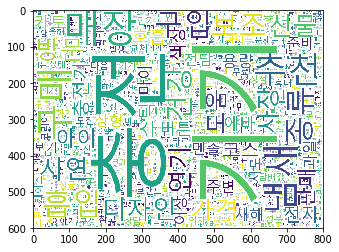

In [13]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict_result)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')